## Power Production Predictions Project

In [1]:
import numpy as np
import pandas as pd

#for using keras to train a model [1]
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#for graph drawing
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = [14, 8]


In [2]:
# reading in the database [2]
xtrain = pd.read_csv("powerproduction.txt", sep=",")

ytrain = xtrain["power"]
xtrain = xtrain["speed"]

#removing anything that isn't numbers
ytrain.drop(index=0, inplace=True)
xtrain.drop(index=0, inplace=True)


In [26]:
# Training the model
model = keras.Sequential([keras.layers.Dense(128)])

model.compile(loss="MeanSquaredError", optimizer="Adam")
history = model.fit(xtrain, ytrain, epochs = 1000)
model.summary()

Epoch 1/1000
16/16 [==============================] - 0s 1ms/step - loss: 4042.7455
Epoch 2/1000
16/16 [==============================] - 0s 1ms/step - loss: 3829.8675
Epoch 3/1000
16/16 [==============================] - 0s 1ms/step - loss: 3860.9492
Epoch 4/1000
16/16 [==============================] - 0s 1ms/step - loss: 3655.3562
Epoch 5/1000
16/16 [==============================] - 0s 1000us/step - loss: 4016.3854
Epoch 6/1000
16/16 [==============================] - 0s 1000us/step - loss: 4050.9209
Epoch 7/1000
16/16 [==============================] - 0s 1000us/step - loss: 3814.2735
Epoch 8/1000
16/16 [==============================] - 0s 1000us/step - loss: 4144.4791
Epoch 9/1000
16/16 [==============================] - 0s 933us/step - loss: 3766.0023
Epoch 10/1000
16/16 [==============================] - 0s 934us/step - loss: 3904.9490
Epoch 11/1000
16/16 [==============================] - 0s 933us/step - loss: 3842.4606
Epoch 12/1000
16/16 [==============================] - 0

16/16 [==============================] - 0s 933us/step - loss: 1048.3837
Epoch 189/1000
16/16 [==============================] - 0s 933us/step - loss: 1007.9540
Epoch 190/1000
16/16 [==============================] - 0s 933us/step - loss: 984.2738
Epoch 191/1000
16/16 [==============================] - 0s 800us/step - loss: 969.9523
Epoch 192/1000
16/16 [==============================] - 0s 800us/step - loss: 974.5056
Epoch 193/1000
16/16 [==============================] - 0s 867us/step - loss: 975.6772
Epoch 194/1000
16/16 [==============================] - 0s 866us/step - loss: 950.8367
Epoch 195/1000
16/16 [==============================] - 0s 866us/step - loss: 956.0822
Epoch 196/1000
16/16 [==============================] - 0s 867us/step - loss: 944.7430
Epoch 197/1000
16/16 [==============================] - 0s 866us/step - loss: 944.1534
Epoch 198/1000
16/16 [==============================] - 0s 867us/step - loss: 957.7314
Epoch 199/1000
16/16 [==============================] - 

16/16 [==============================] - 0s 1ms/step - loss: 465.4431
Epoch 378/1000
16/16 [==============================] - 0s 1ms/step - loss: 549.4083
Epoch 379/1000
16/16 [==============================] - 0s 933us/step - loss: 541.2107
Epoch 380/1000
16/16 [==============================] - 0s 1ms/step - loss: 569.8415
Epoch 381/1000
16/16 [==============================] - 0s 1ms/step - loss: 562.2799
Epoch 382/1000
16/16 [==============================] - 0s 1ms/step - loss: 586.8725
Epoch 383/1000
16/16 [==============================] - 0s 866us/step - loss: 554.6009
Epoch 384/1000
16/16 [==============================] - 0s 933us/step - loss: 488.3622
Epoch 385/1000
16/16 [==============================] - 0s 933us/step - loss: 471.8897
Epoch 386/1000
16/16 [==============================] - 0s 867us/step - loss: 522.9343
Epoch 387/1000
16/16 [==============================] - 0s 933us/step - loss: 518.7525
Epoch 388/1000
16/16 [==============================] - 0s 867us/ste

16/16 [==============================] - 0s 933us/step - loss: 430.0604
Epoch 566/1000
16/16 [==============================] - 0s 933us/step - loss: 467.1635
Epoch 567/1000
16/16 [==============================] - 0s 934us/step - loss: 551.1479
Epoch 568/1000
16/16 [==============================] - 0s 867us/step - loss: 543.6862
Epoch 569/1000
16/16 [==============================] - 0s 867us/step - loss: 607.0319
Epoch 570/1000
16/16 [==============================] - 0s 800us/step - loss: 562.6040
Epoch 571/1000
16/16 [==============================] - 0s 867us/step - loss: 488.7103
Epoch 572/1000
16/16 [==============================] - 0s 867us/step - loss: 478.0108
Epoch 573/1000
16/16 [==============================] - 0s 867us/step - loss: 569.3295
Epoch 574/1000
16/16 [==============================] - 0s 867us/step - loss: 560.3631
Epoch 575/1000
16/16 [==============================] - 0s 867us/step - loss: 527.3433
Epoch 576/1000
16/16 [==============================] - 0s

16/16 [==============================] - 0s 1000us/step - loss: 438.3201
Epoch 754/1000
16/16 [==============================] - 0s 1000us/step - loss: 551.7845
Epoch 755/1000
16/16 [==============================] - 0s 1ms/step - loss: 455.3520
Epoch 756/1000
16/16 [==============================] - 0s 800us/step - loss: 533.9346
Epoch 757/1000
16/16 [==============================] - 0s 800us/step - loss: 444.8820
Epoch 758/1000
16/16 [==============================] - 0s 800us/step - loss: 490.0628
Epoch 759/1000
16/16 [==============================] - 0s 867us/step - loss: 583.1204
Epoch 760/1000
16/16 [==============================] - 0s 867us/step - loss: 604.1959
Epoch 761/1000
16/16 [==============================] - 0s 800us/step - loss: 535.7713
Epoch 762/1000
16/16 [==============================] - 0s 800us/step - loss: 442.6815
Epoch 763/1000
16/16 [==============================] - 0s 867us/step - loss: 583.9503
Epoch 764/1000
16/16 [==============================] - 0s

16/16 [==============================] - 0s 866us/step - loss: 438.7173
Epoch 849/1000
16/16 [==============================] - 0s 933us/step - loss: 540.5361
Epoch 850/1000
16/16 [==============================] - 0s 1ms/step - loss: 534.4033
Epoch 851/1000
16/16 [==============================] - 0s 933us/step - loss: 478.6081
Epoch 852/1000
16/16 [==============================] - 0s 867us/step - loss: 509.4011
Epoch 853/1000
16/16 [==============================] - 0s 933us/step - loss: 510.9597
Epoch 854/1000
16/16 [==============================] - 0s 933us/step - loss: 478.9614
Epoch 855/1000
16/16 [==============================] - 0s 867us/step - loss: 486.7332
Epoch 856/1000
16/16 [==============================] - 0s 933us/step - loss: 561.5967
Epoch 857/1000
16/16 [==============================] - 0s 934us/step - loss: 452.9266
Epoch 858/1000
16/16 [==============================] - 0s 934us/step - loss: 448.8190
Epoch 859/1000
16/16 [==============================] - 0s 9

### Below is a graph of my predictions based on the speed of the wind. I think this is mostly accurate as as the speed of the wind increases, so does the power.

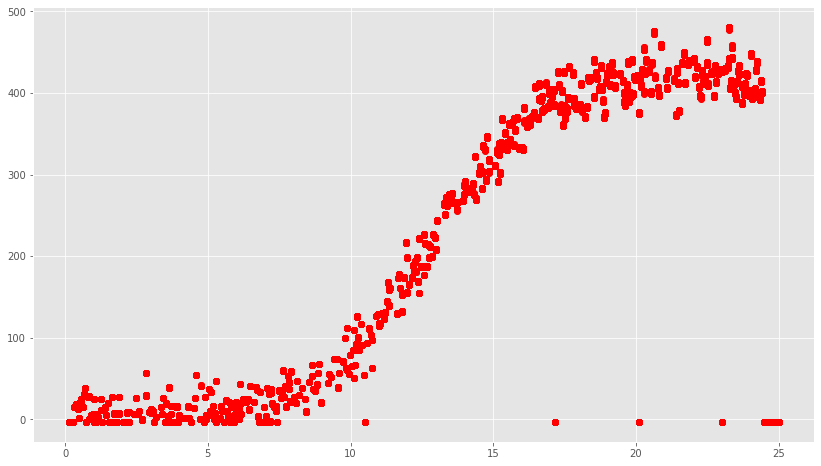

In [27]:
# Plotting the predicted outcomes

plt.plot(xtrain, model.predict(ytrain), 'ro', label = "predicted")


In [24]:
model.save("model.h5")

### References
[1] Keras Site: https://keras.io/getting_started/intro_to_keras_for_engineers/

[2] Shane Lynn: https://www.shanelynn.ie/python-pandas-read_csv-load-data-from-csv-files/